In [126]:
!git clone https://github.com/kaapthijs/DMT-A1.git


Cloning into 'DMT-A1'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 86 (delta 27), reused 36 (delta 11), pack-reused 31
Receiving objects: 100% (86/86), 30.10 MiB | 15.88 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [127]:
import os
os.chdir('DMT-A1')

SEED: 60


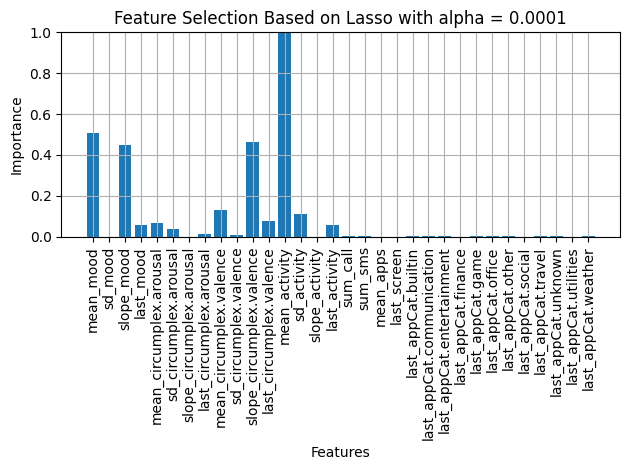

['mean_mood' 'slope_mood' 'last_mood' 'mean_circumplex.arousal'
 'sd_circumplex.arousal' 'last_circumplex.arousal'
 'mean_circumplex.valence' 'sd_circumplex.valence'
 'slope_circumplex.valence' 'last_circumplex.valence' 'mean_activity'
 'sd_activity' 'last_activity' 'sum_call' 'sum_sms' 'last_appCat.builtin'
 'last_appCat.communication' 'last_appCat.entertainment'
 'last_appCat.office' 'last_appCat.other' 'last_appCat.travel']


In [131]:
import pandas as pd
import numpy as np
from feature_engineering import create_features,select_features
import random

#SEED = np.random.randint(100)
SEED = 60
np.random.seed(SEED), random.seed(SEED)
print(f"SEED: {SEED}")
#pd.set_option('future.no_silent_downcasting', True)
dataset = pd.read_csv('./cleaned_dataset.csv')
# Creating features
X, y = create_features(dataset,window_size=3)
features = select_features(X, y, SEED)
print(features)




In [130]:
X.head()

,mean_mood,sd_mood,slope_mood,last_mood,mean_circumplex.arousal,sd_circumplex.arousal,slope_circumplex.arousal,last_circumplex.arousal,mean_circumplex.valence,sd_circumplex.valence,...,last_appCat.entertainment,last_appCat.finance,last_appCat.game,last_appCat.office,last_appCat.other,last_appCat.social,last_appCat.travel,last_appCat.unknown,last_appCat.utilities,last_appCat.weather
0,6.250000,0.433013,0.3,7.000000,-0.25,0.829156,0.7,1.0,0.750000,0.433013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.333333,0.471405,0.5,7.000000,0.00,1.414214,1.5,1.0,0.333333,0.471405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.926829,0.000000,0.0,6.926829,0.00,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.731707,0.000000,0.0,6.731707,0.00,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.536585,0.000000,0.0,6.536585,0.00,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape, y.shape

In [ ]:
X.head(5)

In [69]:
y.head()

,mood
0,6.333333
1,6.926829
2,6.731707
3,6.536585
4,6.341463


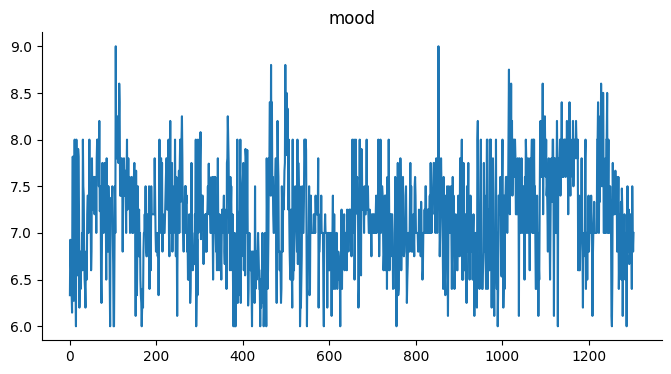

In [7]:
# @title mood

from matplotlib import pyplot as plt
y['mood'].plot(kind='line', figsize=(8, 4), title='mood')
plt.gca().spines[['top', 'right']].set_visible(False)

In [70]:
#mood is removed from variables because it will be coming from the previous cell in LSTM
X = X.drop(labels = ['mean_mood'],axis = 1)


In [71]:
X.head()

,sd_mood,slope_mood,last_mood,mean_circumplex.arousal,sd_circumplex.arousal,slope_circumplex.arousal,last_circumplex.arousal,mean_circumplex.valence,sd_circumplex.valence,slope_circumplex.valence,...,last_appCat.entertainment,last_appCat.finance,last_appCat.game,last_appCat.office,last_appCat.other,last_appCat.social,last_appCat.travel,last_appCat.unknown,last_appCat.utilities,last_appCat.weather
0,0.433013,0.3,7.000000,-0.25,0.829156,0.7,1.0,0.750000,0.433013,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.471405,0.5,7.000000,0.00,1.414214,1.5,1.0,0.333333,0.471405,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,6.926829,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,6.731707,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,6.536585,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
X.columns

Index(['sd_mood', 'slope_mood', 'last_mood', 'mean_circumplex.arousal',
       'sd_circumplex.arousal', 'slope_circumplex.arousal',
       'last_circumplex.arousal', 'mean_circumplex.valence',
       'sd_circumplex.valence', 'slope_circumplex.valence',
       'last_circumplex.valence', 'mean_activity', 'sd_activity',
       'slope_activity', 'last_activity', 'sum_call', 'sum_sms', 'mean_apps',
       'last_screen', 'last_appCat.builtin', 'last_appCat.communication',
       'last_appCat.entertainment', 'last_appCat.finance', 'last_appCat.game',
       'last_appCat.office', 'last_appCat.other', 'last_appCat.social',
       'last_appCat.travel', 'last_appCat.unknown', 'last_appCat.utilities',
       'last_appCat.weather'],
      dtype='object')

In [73]:
#create sequences for the LSTM
def create_sequences(X, y, sequence_length=5):
    X_final= []
    y_final = []
    for i in range(len(X) - sequence_length):
        X_final.append(X.iloc[i:i + sequence_length, :].values)
        y_final.append(y.iloc[i:i + sequence_length])
    return np.array(X_final), np.array(y_final)

X_seq, y_seq = create_sequences(X, y, sequence_length=5)


In [74]:
X_seq.shape,y_seq.shape

((1299, 5, 31), (1299, 5, 1))

In [75]:
from sklearn.model_selection import train_test_split

#custom train test split for sequential data
def train_test_split_custom(data, train_size=0.8):
    split_idx = int(len(data) * train_size)
    train = data[:split_idx]
    test = data[split_idx:]
    return train, test

X_train, X_test = train_test_split_custom(X_seq, train_size=0.8)
y_train, y_test = train_test_split_custom(y_seq, train_size=0.8)
X_train.shape,y_train.shape, X_test.shape,y_test.shape
'''
X_train, X_test = train_test_split(X_seq, train_size=0.75, stratify = (y_seq[:,-1] > 7.5).astype(int))
y_train, y_test = train_test_split(y_seq, train_size=0.75,stratify = (y_seq[:,-1] > 7.5).astype(int))
X_train.shape,y_train.shape, X_test.shape,y_test.shape
'''


'\nX_train, X_test = train_test_split(X_seq, train_size=0.75, stratify = (y_seq[:,-1] > 7.5).astype(int))\ny_train, y_test = train_test_split(y_seq, train_size=0.75,stratify = (y_seq[:,-1] > 7.5).astype(int))\nX_train.shape,y_train.shape, X_test.shape,y_test.shape\n'

In [76]:
len((y_seq[:,-1] > 7.5).astype(int))

1299

In [77]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train.reshape(-1,X_train.shape[2]))

X_train_scaled = scaler.transform(np.reshape(X_train, (-1, X_train.shape[2])))
X_test_scaled = scaler.transform(np.reshape(X_test, (-1, X_test.shape[2])))

# Reshape back to the original dimensions
X_train_scaled = np.reshape(X_train_scaled, X_train.shape)
X_test_scaled = np.reshape(X_test_scaled, X_test.shape)

In [78]:
X_train_scaled.shape

(1039, 5, 31)

In [79]:
##Classification task y_train discritizer
y_train_binary = (y_train > 7.5).astype(int)
y_test_binary = (y_test > 7.5).astype(int)

In [80]:
np.sum(y_train_binary),y_train_binary.shape

(989, (1039, 5, 1))

In [87]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    # Calculate Precision and Recall
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    # Calculate F1 score
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


In [120]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed
import tensorflow as tf

# Model parameters
timesteps = X_train_scaled.shape[1]  # Number of timesteps in the input/output sequence
features = X_train_scaled.shape[2] # Number of features in the input
output_units = 1  # Output dimension (1 for binary classification at each timestep)

# Define the model architecture
input_layer = Input(shape=(timesteps, features))
encoder_lstm = LSTM(10, return_sequences=True)(input_layer)
decoder_lstm = LSTM(10, return_sequences=True)(encoder_lstm)
output_layer = TimeDistributed(Dense(output_units, activation='sigmoid'))(decoder_lstm)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 5, 31)]           0         
                                                                 
 lstm_24 (LSTM)              (None, 5, 10)             1680      
                                                                 
 lstm_25 (LSTM)              (None, 5, 10)             840       
                                                                 
 time_distributed_9 (TimeDi  (None, 5, 1)              11        
 stributed)                                                      
                                                                 
Total params: 2531 (9.89 KB)
Trainable params: 2531 (9.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming binary classification and y_train_scaled is your target array
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_binary.flatten()), y=y_train_binary.flatten())
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
class_weights_dict2 = {0: 1, 1: 10}



In [122]:
class_weights_dict

{0: 0.6175701378982406, 1: 2.62639029322548}

In [114]:
y_train_last_step = y_train_binary[:, -1, 0]  # Select the last timestep value from each sequence

# Similarly adjust y_test_binary if necessary
y_test_last_step = y_test_binary[:, -1, 0]

In [118]:
y_train_last_step.reshape(-1,1)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [123]:
history = model.fit(X_train_scaled,
                    y_train_binary,
                    epochs=5,
                    batch_size=16,
                    validation_split=0.2,
                    #class_weight=class_weights_dict
                    )

Epoch 1/5
831/831 [==============================] - 41s 44ms/step - loss: 0.4975 - accuracy: 0.8164 - val_loss: 0.5654 - val_accuracy: 0.7615
Epoch 2/5
831/831 [==============================] - 5s 6ms/step - loss: 0.4656 - accuracy: 0.8217 - val_loss: 0.5479 - val_accuracy: 0.7615
Epoch 3/5
831/831 [==============================] - 6s 7ms/step - loss: 0.4451 - accuracy: 0.8226 - val_loss: 0.5497 - val_accuracy: 0.7615
Epoch 4/5
831/831 [==============================] - 5s 6ms/step - loss: 0.4281 - accuracy: 0.8274 - val_loss: 0.5843 - val_accuracy: 0.7615
Epoch 5/5
831/831 [==============================] - 8s 9ms/step - loss: 0.4184 - accuracy: 0.8286 - val_loss: 0.6055 - val_accuracy: 0.7615


In [124]:

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_binary)
print("Test Accuracy:", test_accuracy)


9/9 [==============================] - 1s 4ms/step - loss: 0.8237 - accuracy: 0.6031
Test Accuracy: 0.6030769348144531


9/9 [==============================] - 3s 7ms/step


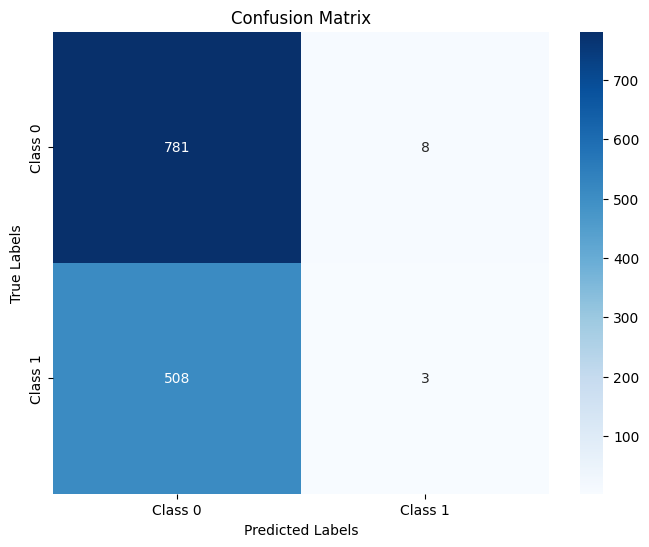

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test set
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test_binary.flatten(), y_test_pred.flatten())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [33]:
print(os.getcwd())

/content/DMT-A1


In [20]:
############# Simple model Seq to Class ##################################

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(timesteps, features)),
    Dropout(0.5),  # Added dropout for regularization
    Dense(1, activation='sigmoid')  # Single output unit for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 50)                16400     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 16451 (64.26 KB)
Trainable params: 16451 (64.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
y_train_new = y_train[:, -1]  # Assuming y_train is shaped as (num_samples, timesteps)
y_test_new = y_test[:, -1]

In [103]:
history = model.fit(X_train_scaled,
                    y_train_new,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2)


Epoch 1/30
13/13 [==============================] - 2s 30ms/step - loss: 0.2121 - accuracy: 0.0000e+00 - val_loss: -1.8704 - val_accuracy: 0.0000e+00
Epoch 2/30
13/13 [==============================] - 0s 8ms/step - loss: -4.8467 - accuracy: 0.0000e+00 - val_loss: -11.9944 - val_accuracy: 0.0000e+00
Epoch 3/30
13/13 [==============================] - 0s 9ms/step - loss: -28.8530 - accuracy: 0.0000e+00 - val_loss: -84.3945 - val_accuracy: 0.0000e+00
Epoch 4/30
13/13 [==============================] - 0s 9ms/step - loss: -224.5263 - accuracy: 0.0000e+00 - val_loss: -640.7220 - val_accuracy: 0.0000e+00
Epoch 5/30
13/13 [==============================] - 0s 9ms/step - loss: -1290.9825 - accuracy: 0.0000e+00 - val_loss: -3003.4829 - val_accuracy: 0.0000e+00
Epoch 6/30
13/13 [==============================] - 0s 8ms/step - loss: -5330.2510 - accuracy: 0.0000e+00 - val_loss: -11437.4863 - val_accuracy: 0.0000e+00
Epoch 7/30
13/13 [==============================] - 0s 8ms/step - loss: -18905.2

In [52]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_new)
print("Test Accuracy:", test_accuracy)


11/11 [==============================] - 0s 4ms/step - loss: -172307070976.0000 - accuracy: 0.0000e+00
Test Accuracy: 0.0
